# Plot the confusion matrix of the residue retrieval; 

43388.0 results


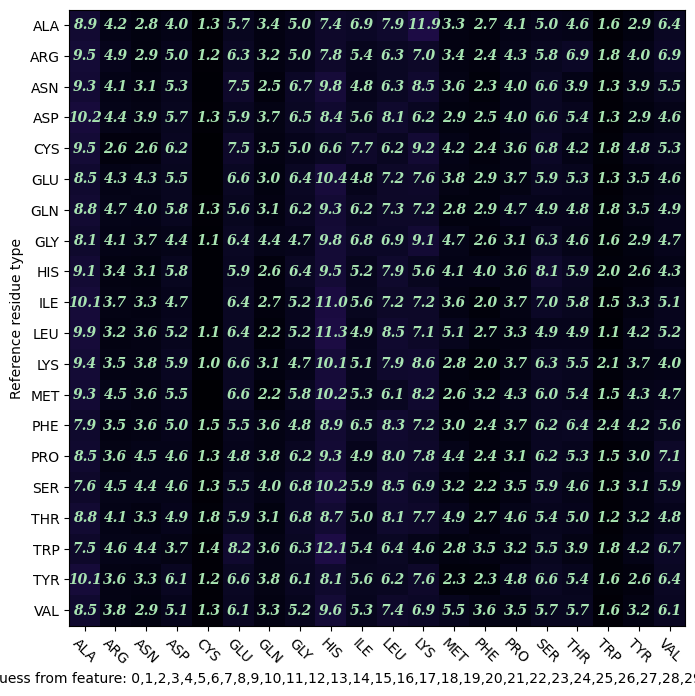

In [7]:
import numpy as np 
import matplotlib.pyplot as plt 

filename = "confusion_matrix_single_residue_retrieval_0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35.npy"
results = np.load(filename, allow_pickle=True)


result_summary = np.zeros((20,20))
for i in results: 
    result_summary += i 
#     print(np.sum(result_summary, axis=1))

print(f"{np.sum(result_summary)} results")

for idx, row in enumerate(result_summary): 
    result_summary[idx,:] = row/np.sum(row);

# for rowidx, rowsum in  enumerate(np.sum(result_summary, axis=1)):
#     result_summary[i,:] = result_summary[i,:] / rowsum
    
thedict = {'ALA': 0, 'ARG': 1, 'ASN': 2, 'ASP': 3, 'CYS': 4, 'GLU': 5, 'GLN': 6, 'GLY': 7, 'HIS': 8, 'ILE': 9,
           'LEU': 10, 'LYS': 11, 'MET': 12, 'PHE': 13, 'PRO': 14, 'SER': 15, 'THR': 16, 'TRP': 17, 'TYR': 18,
           'VAL': 19}


plt.figure(figsize=(8, 8))
plt.imshow(result_summary, cmap="inferno", vmin=0, vmax=1)
for i in range(result_summary.shape[0]):
    for j in range(result_summary.shape[1]):
        if result_summary[i, j] > 0.01:
            plt.text(j, i, f"{result_summary[i, j]*100:.1f}", 
                     ha="center", 
                     va="center", 
                     fontdict = {'family': 'serif',
                        'color':  '#A8E4B1',
                        'weight': 'bold',
                        'style': 'italic',
                        'size': 10,
                       }
                    )

        
plt.xticks(range(len(thedict.keys())), list(thedict.keys()), rotation=-45)
plt.yticks(range(len(thedict.keys())), list(thedict.keys()))
plt.ylabel("Reference residue type")
plt.xlabel(f"Retrieved guess from feature: {filename.split('_')[-1].split('.')[0]}")
# plt.xticklabels()
plt.show()





[[17.0 5.0 1.0 ... 0.0 0.0 0.0]
 [17.0 5.0 1.0 ... 0.0 0.0 0.0]
 [17.0 5.0 1.0 ... 0.0 0.0 0.0]
 ...
 [19.0 6.0 1.0 ... 0.0 0.0 0.0]
 [19.0 6.0 1.0 ... 0.0 0.0 0.0]
 [19.0 6.0 1.0 ... 0.0 0.0 0.0]]
Resname: PHE(ne:    1/1851): mean   2.091, std:    0.116
Resname: VAL(ne:    4/3072): mean  -0.001, std:    0.072
Resname: ILE(ne:    2/2651): mean   0.522, std:    0.097
Resname: HIS(ne:    9/3080): mean   0.518, std:    0.162
Resname: ALA(ne:    0/3901): mean  -1.046, std:    0.000
Resname: TYR(ne:    3/1798): mean   2.087, std:    0.245
Resname: GLY(ne:    0/3901): mean  -1.569, std:    0.000
Resname: ASN(ne:   24/2010): mean  -0.530, std:    0.127
Resname: LEU(ne:    4/4077): mean   0.521, std:    0.094
Resname: SER(ne:    0/2975): mean  -1.046, std:    0.000
Resname: LYS(ne:   69/2689): mean   0.487, std:    0.437
Resname: THR(ne:   14/2987): mean  -0.526, std:    0.088
Resname: MET(ne:    1/1109): mean  -0.000, std:    0.030
Resname: CYS(ne:    0/ 574): mean  -1.046, std:    0.000
Resn

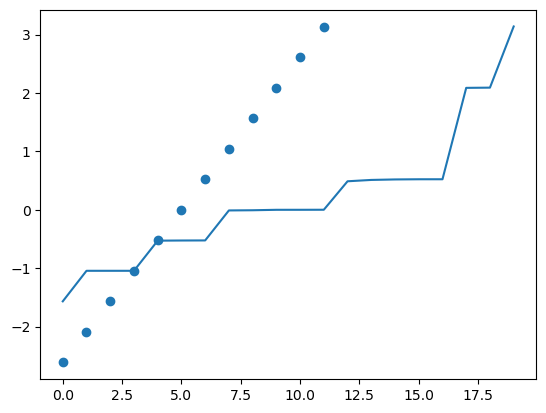

In [2]:
import os
import numpy as np 
import matplotlib.pyplot as plt 

files = ""
files = files.split("%")
resname_list = []
result_arr = []
for i in files:
    name = os.path.split(i)[-1][:3]
    resi = np.load(i, allow_pickle=True)
    result_arr.append(resi)
    resname_list += [name]*resi.shape[0]
result_arr = np.concatenate(result_arr, axis=0)
resname_arr = np.array(resname_list)
print(result_arr)
# 5.003491038990035], stds: [1.91258667
res_norm = (result_arr[:,[1]]-5) / 1.912
points = []
for i in set([str(_) for _ in resname_arr.tolist()]): 
    ne_c = 0
    idxs = np.where(resname_arr == i)[0]
    values = np.array(result_arr[:,[1]].ravel(), dtype=int)
    for idx in idxs:
        if values[idx] != values[idxs[0]]: 
            ne_c += 1
            
    print(f"Resname: {i}(ne: {ne_c:4}/{len(idxs):4}): mean{res_norm[idxs].mean():8.3f}, std: {result_arr[:,1][idxs].std():8.3f}")
    points.append(res_norm[idxs].mean())
    
#     print(result_arr[np.where(resname_arr == i)])

points.sort()
plt.plot(points)

x = np.arange(0, 12)
zscore = (x-5.003491038990035)/1.91258667
plt.scatter(x, zscore)
plt.show()
